In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

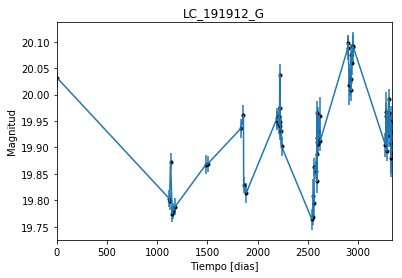

In [2]:
 data = np.genfromtxt('LC_191912_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_191912_G')
plt.savefig("LC_191912_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

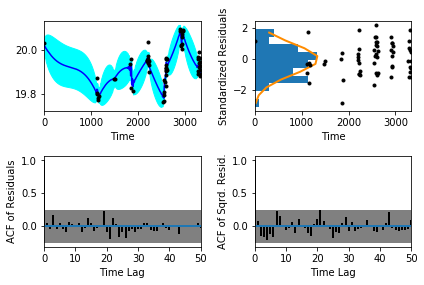

In [5]:
sample.assess_fit()

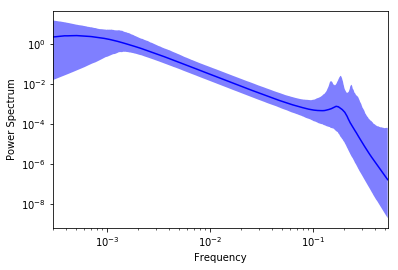

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

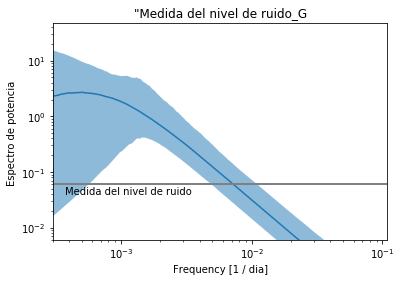

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_191912_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_191912_G')

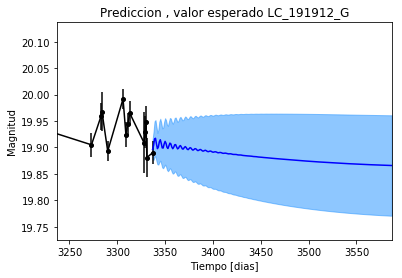

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_191912_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_191912_G')

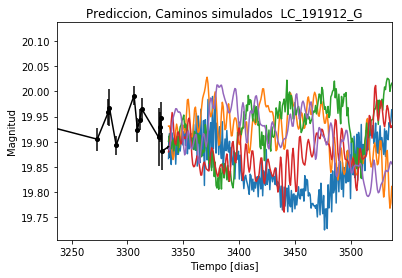

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_191912_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


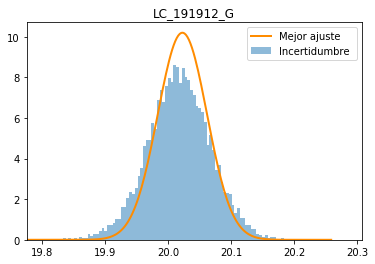

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_191912_G')
plt.savefig("Mejor_ajuste_LC_191912_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_191912_G')

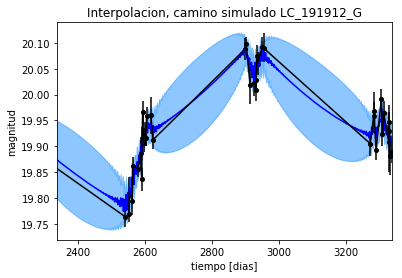

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191912_G')

Text(0.5,1,'Interpolacion, camino simulado LC_191912_G')

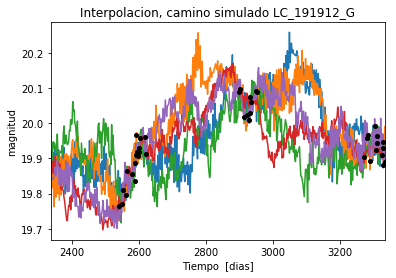

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191912_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 751.204317075
Median: 0.00875229440177
Standard deviation: 0.0564980574204
68% credibility interval: [ 0.00324335  0.02096779]
95% credibility interval: [ 0.00075662  0.09255905]
99% credibility interval: [  3.19683631e-04   4.24164699e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 637.756171459
Median: 0.0087380829463
Standard deviation: 0.0525161674824
68% credibility interval: [ 0.00323406  0.02086785]
95% credibility interval: [ 0.00074275  0.08779394]
99% credibility interval: [  3.19683631e-04   4.05777362e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 206.691457496
Median: 0.0694163906267
Standard deviation

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 740.543348821
Median: 130.833114935
Standard deviation: 2.2455856241
68% credibility interval: [ 128.36898744  132.60030919]
95% credibility interval: [ 125.0101669   133.73604879]
99% credibility interval: [ 122.62734048  134.33273606]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 269.432395768
Median: 0.697795156963
Standard deviation: 1.9317879135
68% credibility interval: [ 0.12369189  3.84043356]
95% credibility interval: [ 0.05673045  6.35206252]
99% credibility interval: [ 0.03392842  6.84616401]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 340.893194101
Median: 1.6596225782
Standard deviation: 8.45880548197
68% credibility interval: [ 1.17560734  5.00895611]
95% credibility interval: [  0.77972878  27.9

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10139.8575637
Median: 0.000162475206711
Standard deviation: 1.60563314786e+113
68% credibility interval: [  1.67241882e-52   1.58204603e+47]
95% credibility interval: [  3.32768777e-147   4.34218216e+108]
99% credibility interval: [  3.07519490e-185   6.79259513e+111]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 973.377978553
Median: 19.9141925324
Standard deviation: 0.0396467485176
68% credibility interval: [ 19.88299598  19.94842285]
95% credibility interval: [ 19.83317158  19.99993776]
99% credibility interval: [ 19.79047119  20.04902384]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 277.982386892
Median: 0.191351375046
Standard deviation: 0.204572604537
68% credibility interval: [ 0.16325994  0.31763544]
95% credibility interval: [ 0.1293548   0.83608617]
99% credibility interval: [ 0.07938362  0.95283296]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 277.982386892
Median: 0.191351375046
Standard deviation: 0.204572604537
68% credibility interval: [ 0.16325994  0.31763544]
95% credibility interval: [ 0.1293548   0.83608617]
99% credibility interval: [ 0.07938362  0.95283296]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 347.678053504
Median: 0.0
Standard deviation: 0.000624540023552
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 740.543348821
Median: 130.833114935
Standard deviation: 2.2455856241
68% credibility interval: [ 128.36898744  132.60030919]
95% credibility interval: [ 125.0101669   133.73604879]
99% credibility interval: [ 122.62734048  134.33273606]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 481.210420622
Median: 0.0116139195652
Standard deviation: 0.00657175099372
68% credibility interval: [ 0.00757703  0.0184952 ]
95% credibility interval: [ 0.00536957  0.03118922]
99% credibility interval: [ 0.00442689  0.03939124]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 792.999458772
Median: 1.01332440069
Standard deviation: 0.216413420236
68% credibility interval: [ 0.83837469  1.24983412]
95% credibility interval: [ 0.70994159  1.56715682]
99% credibility interval: [ 0.6403808   1.77819362]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 472.03267878
Median: 0.00611809706566
Standard deviation: 0.242572461474
68% credibility interval: [  1.68949795e-49   6.76911922e-02]
95% credibility interval: [  3.04775084e-111   8.52150769e-001]
99% credibility interval: [  2.19364756e-114   1.60235783e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 751.204317075
Median: (-0.0549922875893-0.964038304348j)
Standard deviation: 1.33348645903
68% credibility interval: [-0.13174449-1.23440335j -0.02037860-1.07015242j]
95% credibility interval: [-0.58156566-6.00642306j -0.00475401-1.18392867j]
99% credibility interval: [ -2.66510541e+00-3.29823866j  -2.00863149e-03-5.11899333j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 637.756171459
Median: (-0.0549029943811+1.28376266486j)
Standard deviation: 1.3270453046
68% credibility interval: [-0.13111655+5.03228209j -0.02032018+1.57462457j]
95% credibility interval: [-0.55162559+3.81483354j -0.00466682+1.22744075j]
99% credibility interval: [ -2.54957436e+00+0.02517414j  -2.00863149e-03+5.11899333j]
Posterior summary for pa